In [1]:
import pandas as pd
import numpy as np
import itertools
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('news.csv', index_col=None)
dataset=df.drop("Unnamed: 0",axis=1)
y=dataset["label"]
X_train, X_test, y_train, y_test = train_test_split(dataset['text'], y, test_size=0.33, random_state=53)
Tfidf_Vectorizer =TfidfVectorizer(stop_words='english')
Tfidf_train = Tfidf_Vectorizer.fit_transform(X_train)
print(Tfidf_train)
Tfidf_test =Tfidf_Vectorizer.transform(X_test)
len(Tfidf_Vectorizer.get_feature_names_out())
print(Tfidf_train.toarray())

  (1, 42470)	0.07711040274149526
  (1, 12105)	0.15008066461476866
  (1, 54177)	0.13782629144711137
  (1, 50628)	0.061296988343109586
  (1, 15924)	0.3479045460649079
  (1, 44520)	0.4973826512693341
  (1, 51896)	0.11596517664605868
  (1, 35783)	0.30902690818827977
  (1, 35256)	0.12628385718450857
  (1, 21881)	0.21271688045815978
  (1, 42534)	0.06081715886809217
  (1, 8399)	0.08729542880625335
  (1, 29531)	0.1454406205718245
  (1, 15927)	0.4973826512693341
  (1, 25686)	0.13550453594288983
  (1, 49203)	0.1672740861784377
  (1, 16814)	0.10404977746548139
  (1, 36087)	0.12648679854389897
  (1, 21568)	0.1007920919566398
  (1, 25684)	0.1030420922189754
  (1, 38823)	0.06048803110658644
  (1, 47506)	0.14539060877460044
  (1, 36831)	0.10772488937433067
  (2, 16972)	0.1606296088662543
  (2, 762)	0.48803966069171073
  :	:
  (4243, 41435)	0.02969665315895183
  (4243, 53607)	0.044665186536595916
  (4243, 659)	0.04293180970016178
  (4243, 38834)	0.037049324915825195
  (4243, 19003)	0.03443753105034290

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def evaluate_classifier(classifier, X_test, y_test):
    # Make predictions
    y_pred = classifier.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Generate classification report
    report = classification_report(y_test, y_pred)
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    return accuracy, report, cm

def logistic_regression(X_train, y_train, X_test):
    # Fitting Logistic Regression to the Training set
    classifier = LogisticRegression(random_state=0)
    classifier.fit(X_train, y_train)
    accuracy, report, cm = evaluate_classifier(classifier, X_test, y_test)
    return classifier, accuracy, report, cm

def linear_svm(X_train, y_train, X_test):
    # Fitting Linear SVM to the Training set
    classifier = SVC(kernel='linear', random_state=0)
    classifier.fit(X_train, y_train)
    accuracy, report, cm = evaluate_classifier(classifier, X_test, y_test)
    return classifier, accuracy, report, cm

def kernel_svm(X_train, y_train, X_test):
    # Fitting Kernel SVM to the Training set
    classifier = SVC(kernel='rbf', random_state=0)
    classifier.fit(X_train, y_train)
    accuracy, report, cm = evaluate_classifier(classifier, X_test, y_test)
    return classifier, accuracy, report, cm

def naive_bayes(X_train, y_train, X_test):
    # Fitting Naive Bayes to the Training set
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    accuracy, report, cm = evaluate_classifier(classifier, X_test, y_test)
    return classifier, accuracy, report, cm

def k_nearest_neighbors(X_train, y_train, X_test):
    # Fitting K-Nearest Neighbors to the Training set
    classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
    classifier.fit(X_train, y_train)
    accuracy, report, cm = evaluate_classifier(classifier, X_test, y_test)
    return classifier, accuracy, report, cm

def decision_tree(X_train, y_train, X_test):
    # Fitting Decision Tree to the Training set
    classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
    classifier.fit(X_train, y_train)
    accuracy, report, cm = evaluate_classifier(classifier, X_test, y_test)
    return classifier, accuracy, report, cm

def random_forest(X_train, y_train, X_test):
    # Fitting Random Forest to the Training set
    classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    classifier.fit(X_train, y_train)
    accuracy, report, cm = evaluate_classifier(classifier, X_test, y_test)
    return classifier, accuracy, report, cm

# Sample usage
X_train, X_test, y_train, y_test = train_test_split(dataset['text'], y, test_size=0.33, random_state=53)

# Apply TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Call each algorithm function with the training and test data
models = {
    'Logistic Regression': logistic_regression(tfidf_train, y_train, tfidf_test),
    'Linear SVM': linear_svm(tfidf_train, y_train, tfidf_test),
    'Kernel SVM': kernel_svm(tfidf_train, y_train, tfidf_test),
     'Naive Bayes': naive_bayes(tfidf_train.toarray(), y_train, tfidf_test.toarray()), # Naive Bayes expects dense matrix
    'K-Nearest Neighbors': k_nearest_neighbors(tfidf_train, y_train, tfidf_test),
    'Decision Tree': decision_tree(tfidf_train, y_train, tfidf_test),
    'Random Forest': random_forest(tfidf_train, y_train, tfidf_test)
}

# Print results
for clf_name, (classifier, accuracy, report, cm) in models.items():
    print(clf_name)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(cm)
    print("---------------------------------------")
    

Logistic Regression
Accuracy: 0.9134385461501674
Classification Report:
              precision    recall  f1-score   support

        FAKE       0.88      0.95      0.91      1008
        REAL       0.95      0.88      0.91      1083

    accuracy                           0.91      2091
   macro avg       0.92      0.91      0.91      2091
weighted avg       0.92      0.91      0.91      2091

Confusion Matrix:
[[962  46]
 [135 948]]
---------------------------------------
Linear SVM
Accuracy: 0.9344811095169775
Classification Report:
              precision    recall  f1-score   support

        FAKE       0.91      0.96      0.93      1008
        REAL       0.96      0.91      0.94      1083

    accuracy                           0.93      2091
   macro avg       0.93      0.94      0.93      2091
weighted avg       0.94      0.93      0.93      2091

Confusion Matrix:
[[965  43]
 [ 94 989]]
---------------------------------------
Kernel SVM
Accuracy: 0.9220468675274988
Classific

In [4]:
import pandas as pd

# Initialize empty lists to store classifier names and accuracies
classifier_names = []
accuracies = []

# Iterate over each classifier and store the accuracy
for clf_name, (classifier, accuracy, _, _) in models.items():
    classifier_names.append(clf_name)
    accuracies.append(accuracy)

# Create a DataFrame to store the accuracy scores
accuracy_df = pd.DataFrame({
    'Classifier': classifier_names,
    'Accuracy': accuracies
})

# Display the DataFrame
print(accuracy_df)

            Classifier  Accuracy
0  Logistic Regression  0.913439
1           Linear SVM  0.934481
2           Kernel SVM  0.922047
3          Naive Bayes  0.809660
4  K-Nearest Neighbors  0.544237
5        Decision Tree  0.817791
6        Random Forest  0.850311


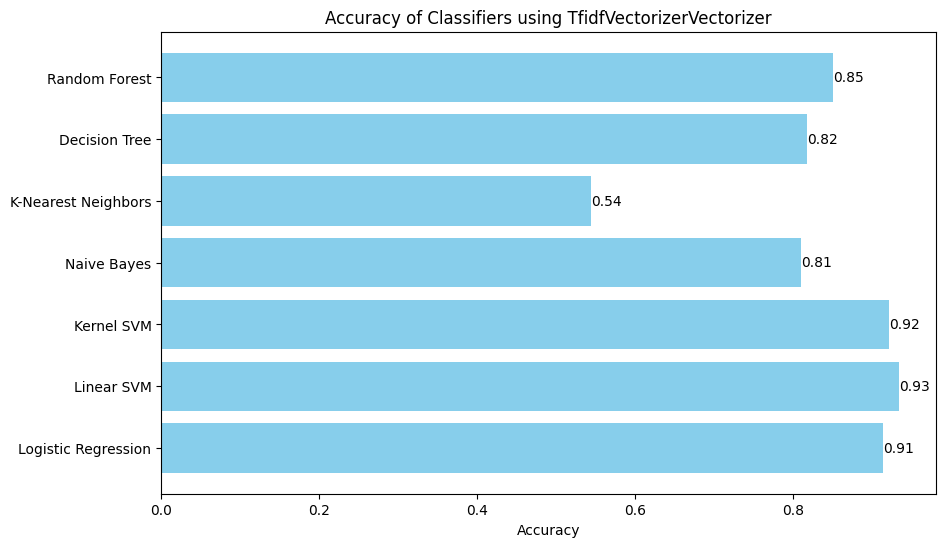

In [7]:
import matplotlib.pyplot as plt

# Initialize lists to store classifier names and accuracy scores
classifiers = []
accuracies = []

# Iterate over each classifier and store the accuracy scores
for clf_name, (_, accuracy, _, _) in models.items():
    classifiers.append(clf_name)
    accuracies.append(accuracy)

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Classifiers using TfidfVectorizerVectorizer')

# Add accuracy scores to the end of each bar
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{acc:.2f}', 
             va='center', ha='left')